In [2]:
# Project 1: Used Car Price Analysis

# 1️⃣ Import libraries
import pandas as pd # pandas to work with data 
import seaborn as sns # to create graphs
import matplotlib.pyplot as plt # to display and customize plots 


In [3]:

# 2️⃣ Load dataset
df = pd.read_csv("final_cars_datasets.csv")


In [5]:

# Remove unnecessary column if exists
df = df.drop(columns=['Unnamed: 0'], errors='ignore')  # remove extra columns that is not useful


In [6]:

# 3️⃣ Show first 5 rows
print("FIRST 5 ROWS:") 
print(df.head()) # this show frist 5 rows 

# 4️⃣ Show columns
print("\nCOLUMNS:")
print(df.columns) # show all columns names

# 5️⃣ Select important columns
df = df[['price', 'year', 'mark', 'fuel', 'mileage', 'transmission']]

print("\nAFTER SELECTING IMPORTANT COLUMNS:")
print(df.head())


FIRST 5 ROWS:
   price      mark    model  year  mileage  engine_capacity transmission  \
0     80    nissan    march  2003    80000             1240           at   
1    110    nissan    march  2010    53000             1200           at   
2    165    nissan  lafesta  2005    47690             2000           at   
3    190    toyota  avensis  2008   130661             1990           at   
4    190  daihatsu     mira  2006    66300              660           at   

  drive hand_drive      fuel  
0   2wd        rhd  gasoline  
1   2wd        rhd  gasoline  
2   2wd        rhd  gasoline  
3   2wd        rhd  gasoline  
4   2wd        rhd  gasoline  

COLUMNS:
Index(['price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='str')

AFTER SELECTING IMPORTANT COLUMNS:
   price  year      mark      fuel  mileage transmission
0     80  2003    nissan  gasoline    80000           at
1    110  2010    nissan  gasoline    

In [7]:

# 6️⃣ Check missing values
print("\nMISSING VALUES:")
print(df.isnull().sum()) # check how many missing values in each column

# 7️⃣ Remove missing values
df = df.dropna()

# 8️⃣ Clean unrealistic values
df = df[(df['price'] > 1000) & (df['price'] < 100000)]
df = df[(df['mileage'] > 0) & (df['mileage'] < 300000)]

print("\nFINAL CLEANED DATA:")
print(df.head())



MISSING VALUES:
price           0
year            0
mark            0
fuel            0
mileage         0
transmission    0
dtype: int64

FINAL CLEANED DATA:
      price  year    mark      fuel  mileage transmission
1162   1008  2005  toyota  gasoline    68491           at
1163   1008  2005  toyota  gasoline    57014           at
1164   1008  2004  toyota  gasoline    40380           at
1165   1008  2009   mazda  gasoline    11855           at
1166   1008  2011   honda  gasoline    43201           at


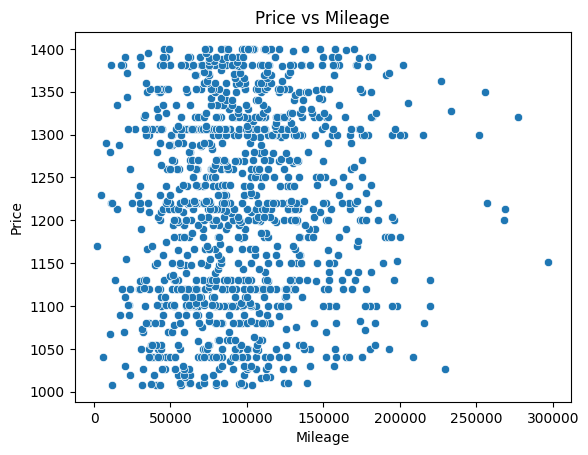

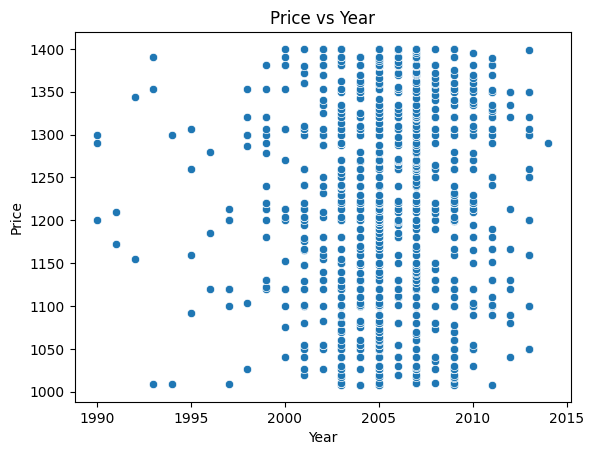

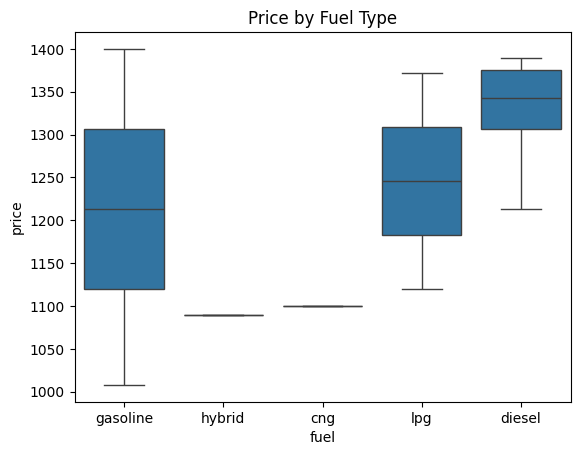

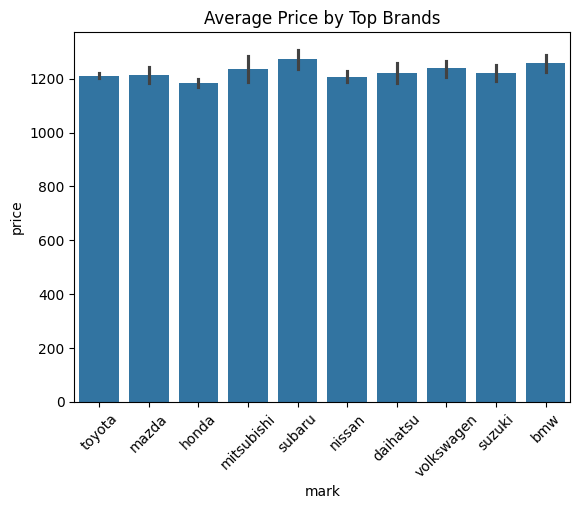

In [8]:

# 📊 VISUALIZATIONS

# Price vs Mileage
plt.figure()
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

# Price vs Year
plt.figure()
sns.scatterplot(x='year', y='price', data=df)
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# Price by Fuel Type
plt.figure()
sns.boxplot(x='fuel', y='price', data=df)
plt.title("Price by Fuel Type")
plt.show()

# Average Price by Brand
top_brands = df['mark'].value_counts().nlargest(10).index  # find top 10 most common car brands
df_top = df[df['mark'].isin(top_brands)]  # filter the dataset include only top brands

plt.figure()
sns.barplot(x='mark', y='price', data=df_top) # shows average price by brand
plt.xticks(rotation=45)
plt.title("Average Price by Top Brands")
plt.show()